In this example we will investigate how nonlinear Lie transform (a polynomial neural network) outperforms LSTM neural network for physical system learning. Let's generate data from SIR model that is used for nonlinear dynamics investigation in epidemiology :

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from cntk import load_model

import physical_models as phys
import models

from main_epidemiology import plot
from SIR_Lie import SIR_Lie_Transform

In [4]:
# generate data from physical model
T = 10 # time interval
dt = 0.1 # integration step
# train data:
t, train = phys.simulate_epidemiology(0, np.array([0.99, 0.01, 0]), T, dt=dt)
# test data 1st:
_, test1 = phys.simulate_epidemiology(0, np.array([0.4, 0.1, 0]), T, dt=dt)
# test data 2nd:
_, test2 = phys.simulate_epidemiology(0, np.array([1, 0.0, 0]), T, dt=dt)


One can train both LSTM, and Linear models:

In [7]:
N = 5 # size of the history window (for LSTM)

# train lstm model
# model_lstm = models.train_lstm(train, N)
# model_lstm.save('bin_models/epidemiology_lstm')
# or load pre-built one
model_lstm = load_model('bin_models/epidemiology_lstm')


# for training a polynomial neural network (matrix Lie transform) follow link
# https://github.com/andiva/DeepLieNet/blob/master/demo/SIR_Identification.ipynb
# load pre-built 3rd order Lie transform:
model_linear =  SIR_Lie_Transform()

For training only one solution was selected. For testing other initial conditions are investigated.

/usr/local/lib/python3.5/dist-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input3") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


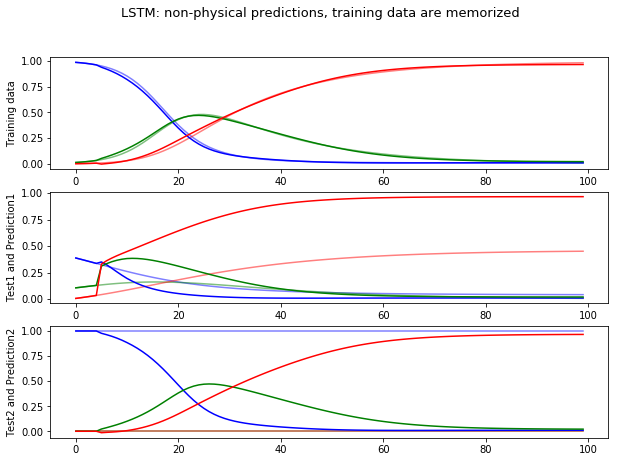

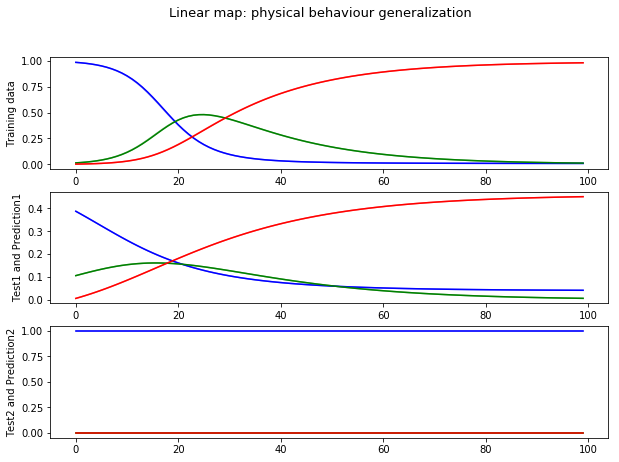

In [8]:
for model, n, title in zip([model_lstm, model_linear],
                           [N, 1],
                           ["LSTM: non-physical predictions, training data are memorized",
                            "Linear map: physical behaviour generalization"]):
    # use model for prediction with training initial conditions
    pred = models.predict(model, train[:n], step_count=int(T/dt-n), N=n)
    # use model for prediction with initial condition of test1
    pred1 = models.predict(model, test1[:n], step_count=int(T/dt-n), N=n)
    # use lstm for prediction with initial condition of test2
    pred2 = models.predict(model, test2[:n], step_count=int(T/dt-n), N=n)

    plot(title, train, test1, test2, pred, pred1, pred2)
    
plt.show()

One can see, that LSTM every time just reproduces training data. While polynomial neural network recognizes dynamics of epidemiology and preserves physical behaviour.